In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [2]:
# we are using iexcloud to
stock_name = "AAPL"
token = "pk_83d03d65e027441cbf1122bac867d84d"

In [34]:
df_temp = pd.read_json('https://cloud.iexapis.com/stable/stock/'+stock_name+'/chart/1m?token='+token+'')

In [35]:
df_temp

,change,changeOverTime,changePercent,close,date,high,label,low,open,uClose,uHigh,uLow,uOpen,uVolume,volume
0,0.00,0.000000,0.0000,219.89,2019-09-26,220.94,Sep 26,218.83,220.00,219.89,220.94,218.83,220.00,19088312,19088312
1,-1.07,-0.004866,-0.4866,218.82,2019-09-27,220.96,Sep 27,217.28,220.54,218.82,220.96,217.28,220.54,25361285,25361285
2,5.15,0.018555,2.3535,223.97,2019-09-30,224.58,Sep 30,220.79,220.90,223.97,224.58,220.79,220.90,26318583,26318583
3,0.62,0.021374,0.2768,224.59,2019-10-01,228.22,Oct 1,224.20,225.07,224.59,228.22,224.20,225.07,36187163,36187163
4,-5.63,-0.004229,-2.5068,218.96,2019-10-02,223.58,Oct 2,217.93,223.06,218.96,223.58,217.93,223.06,35767257,35767257
5,1.86,0.004229,0.8495,220.82,2019-10-03,220.96,Oct 3,215.13,218.43,220.82,220.96,215.13,218.43,30352686,30352686
6,6.19,0.032380,2.8032,227.01,2019-10-04,227.49,Oct 4,223.89,225.64,227.01,227.49,223.89,225.64,34755553,34755553
7,0.05,0.032607,0.0220,227.06,2019-10-07,229.93,Oct 7,225.84,226.27,227.06,229.93,225.84,226.27,30889269,30889269
8,-2.66,0.020510,-1.1715,224.40,2019-10-08,228.06,Oct 8,224.33,225.82,224.40,228.06,224.33,225.82,29282700,29282700
9,2.63,0.032471,1.1720,227.03,2019-10-09,227.79,Oct 9,225.64,227.03,227.03,227.79,225.64,227.03,19029424,19029424


In [36]:
len(df_temp)

22

In [37]:
#df_temp.set_index('date',inplace=True)

In [38]:
date_list = []
open_list=[]

for ct in range(0,len((df_temp))):
    date_list.append([
    round(((time.mktime(list(df_temp.date)[ct].timetuple())/100)-\
    (time.mktime(list(df_temp.date)[0].timetuple())/100))/864)
    ])
    #date_list.append([list(range(1,len(df_temp)+1))[ct]])
    open_list.append([float(df_temp.open[ct])])

In [39]:
date_list

[[0],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13],
 [14],
 [15],
 [18],
 [19],
 [20],
 [21],
 [22],
 [25],
 [26],
 [27],
 [28],
 [29]]

In [40]:
svr_lin = SVR(kernel= 'linear',C=1e3)
svr_poly = SVR(kernel= 'poly',C=1e3, degree = 2)
svr_rbf = SVR(kernel = 'rbf',C=1e3,gamma=0.1)
svr_lin.fit(date_list,open_list)
svr_poly.fit(date_list,open_list)
svr_rbf.fit(date_list,open_list)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector 

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

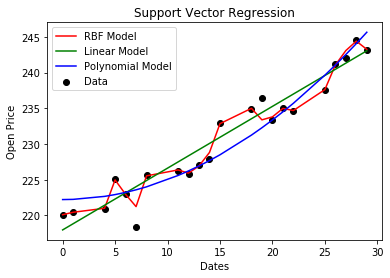

In [42]:
plt.scatter(date_list,open_list, color='black',label='Data')
plt.plot(date_list,svr_rbf.predict(date_list),color='red',label='RBF Model')
plt.plot(date_list,svr_lin.predict(date_list),color='green',label='Linear Model')
plt.plot(date_list,svr_poly.predict(date_list),color='blue',label='Polynomial Model')
plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [28]:
print(svr_rbf.predict([[367]]))
print(open_list[-1])

[205.59395847]
[243.16]


In [ ]:
svr_poly.predict([[len(df_temp)+10]])

In [ ]:
svr_lin.predict([[len(df_temp)+10]])

In [ ]:
(time.mktime(list(df_temp.date)[0].timetuple())/100)

In [ ]:
time.mktime(list(df_temp.date)[1].timetuple())

In [9]:

(((time.mktime(list(df_temp.date)[1].timetuple())/100)-\
(time.mktime(list(df_temp.date)[0].timetuple())/100))/864)

1.0
3.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0
3.0
1.0
1.0
1.0
1.0


IndexError: list index out of range

In [45]:
future_date_list=[]
for i in list(range(round(len(df_temp)/2),round(len(df_temp)/2)*3)):
    future_date_list.append([i])

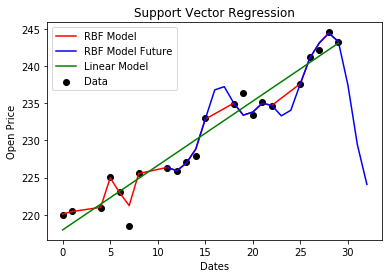

In [50]:
plt.scatter(date_list,open_list, color='black',label='Data')
plt.plot(date_list,svr_rbf.predict(date_list),color='red',label='RBF Model')
plt.plot(future_date_list,svr_rbf.predict(future_date_list),color='blue',label='RBF Model Future')
plt.plot(date_list,svr_lin.predict(date_list),color='green',label='Linear Model')
#plt.plot(date_list,svr_poly.predict(date_list),color='blue',label='Polynomial Model')
plt.xlabel('Dates')
plt.ylabel('Open Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()